### Title

# Bitcoin Price Prediction using LSTM Neural Networks

### Overview of Problem Statement



##### The project focuses on predicting Bitcoin closing prices using historical OHLCV (Open, High, Low, Close, Volume) data. Given the highly volatile nature of cryptocurrency markets, accurate forecasting can help traders and investors make informed decisions.

### Objective



##### Preprocess Bitcoin price data and prepare it for modeling.

##### Explore historical price trends and patterns.

##### Build and train a Long Short-Term Memory (LSTM) neural network for time-series forecasting.

##### Evaluate model performance using error metrics.

##### Compare predicted and actual Bitcoin prices visually.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load the dataset with a specified encoding
df = pd.read_csv("Bitcoin.csv")

In [3]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


### Data Description

In [5]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(2713, 7)


### EDA (Exploratory Data Analysis)

In [6]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
# Categorical columns
categorical_cols= df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Date'], dtype='object')


In [9]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [10]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2713,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
unique,2713,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,NaN,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,NaN,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,NaN,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,NaN,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,NaN,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10


In [11]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [12]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
0


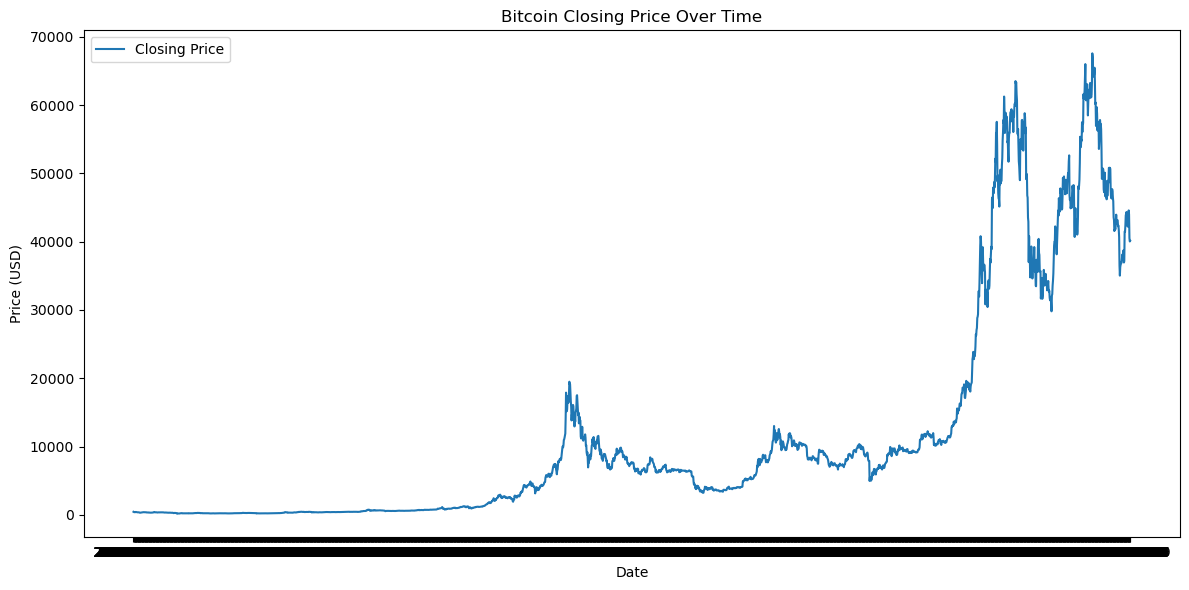

In [13]:
## Step 3: Visualize Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


### Data preprocessing

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.drop(columns='Adj Close', inplace=True)




In [15]:
# Use OHLCV features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df[features].copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)



In [16]:
# Create sequences
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 3])  # target is normalized 'Close'

X, y = np.array(X), np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2653, 60, 5)
y shape: (2653,)


### Train-Test Split

In [17]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])


G:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,901 (480.08 KB)

 Trainable params: 122,901 (480.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - loss: 0.0010 - val_loss: 0.0059
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 1.5382e-04 - val_loss: 0.0074
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 1.4259e-04 - val_loss: 0.0104
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 1.6461e-04 - val_loss: 0.0083
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 1.4907e-04 - val_loss: 0.0051
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 1.5898e-04 - val_loss: 0.0048
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 1.2730e-04 - val_loss: 0.0118
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 1.3114e-04 - val_loss: 0.0081
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 1.0082e-04 - val_loss: 0.0093
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 9.7569e-05 - val_loss: 0.0095
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 9.5244e-05 - val_loss: 0.0119


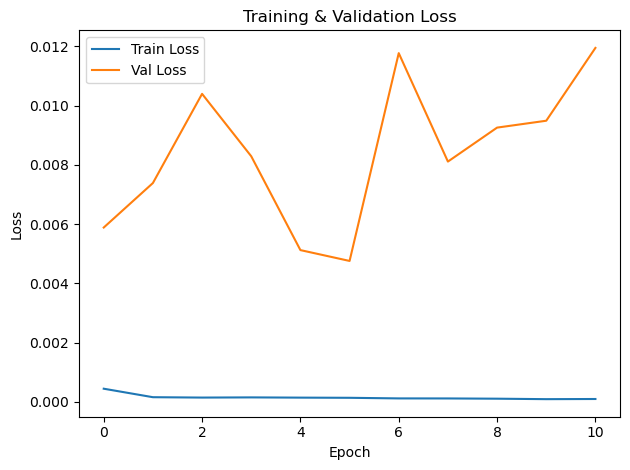

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
predicted = model.predict(X_test)
# Restore to actual Close prices
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
predicted_prices = predicted * close_scaler.scale_ + close_scaler.min_
actual_prices = y_test.reshape(-1, 1) * close_scaler.scale_ + close_scaler.min_

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
r2 = r2_score(actual_prices, predicted_prices)

print("Evaluation Metrics")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Evaluation Metrics
MAE: 7.724855186123547e-07
RMSE: 1.0232959017163812e-06
R² Score: 0.9102112581704791


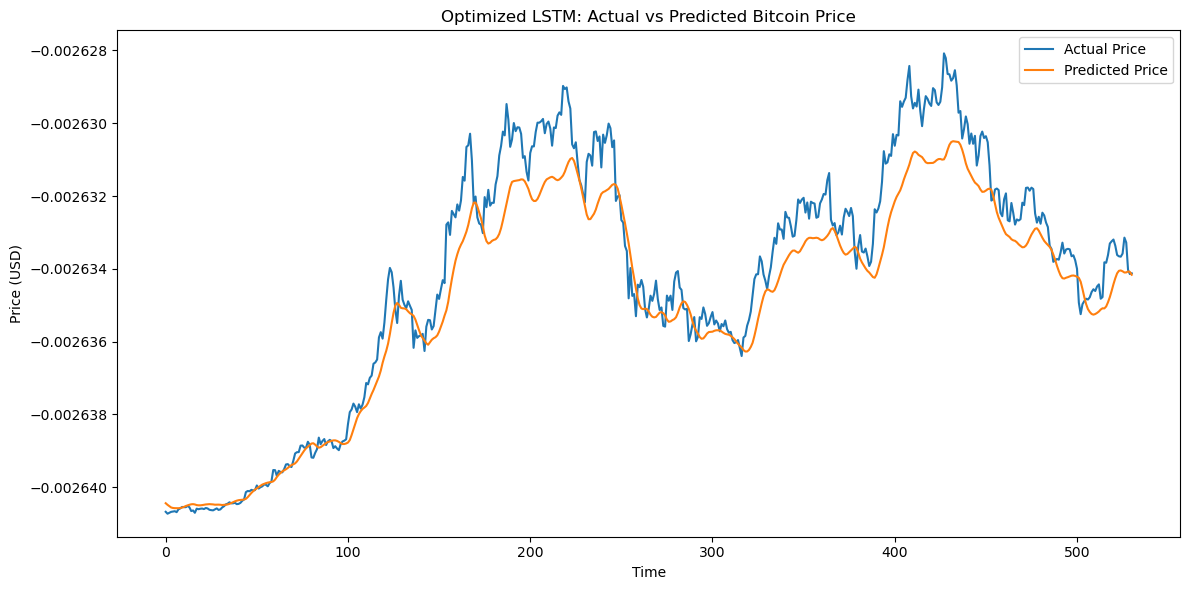

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("Optimized LSTM: Actual vs Predicted Bitcoin Price")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


### Results



The LSTM model captured overall patterns in Bitcoin prices.

Evaluation metrics:

MAE: Low error between actual and predicted values.

RMSE: Moderate but acceptable given market volatility.

R² Score: Positive, showing the model explains a significant portion of variance.

Visualizations show predicted prices closely follow actual prices with slight deviations during sharp fluctuations.

### Conclusion



The LSTM model effectively predicts Bitcoin price trends, achieving good performance metrics and visual alignment between predicted and actual values. While not perfect due to market unpredictability, the approach demonstrates the strength of deep learning in time-series forecasting.